### Name: Lalith Aditya
### Class: 1st MSC
### Regd No: 22231
### MDH campus 


<h3>Project description: This project is set to test the knowledge about classifier models that we learnt in week 4.</h3>
<h4>1.Download the dataset from the above lines of codes</h4>
<h4>2.Do the necessary data pre-processing if required.</h4>
<h4>3.Implement the following classification models (You can use default hyper-parameters for this)</h4>
<h4>a.Decision Tree</h4>
<h4>b.Random Forest</h4>
<h4>c.Gradient Boosting Method</h4>
<h4>d.K-Nearest Neighbour</h4>
<h4>4.Use the following parameter for tuning the hyper-parameters of the Decision Tree model</h4>
<h3>a.>>> {‘criterion’: [“gini”, “entropy”], ‘max_depth’: [10, 20, 50, 100], ‘min_samples_leaf’:[10, 20, 50]}</h3>
<h4>5.Compare the results of various models</h4>

This is a basic classification problem
We are trying to fit the data to some of the models and checking their accuracy and which model is giving better accuracy!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#1.
###Download the dataset from the above lines of codes

In [2]:
from sklearn.datasets import load_breast_cancer
df = pd.DataFrame(load_breast_cancer()['data'],
columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target'] 

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#2.
###Do the necessary data pre-processing if required.

In [4]:
## Attempting some preprocessing stuff
# Missing Values

missing_cols = df.columns[df.isnull().any()]

# Print the names of the columns with missing values
if len(missing_cols) > 0:
    print("The following columns have missing values:")
    for col in missing_cols:
        print(col)
else:
    print("No columns have missing values.")

No columns have missing values.


In [5]:
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Removing Outliers using quantile method

In [6]:
columns = df.columns
columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'y'],
      dtype='object')

In [7]:
df['mean radius'].quantile(0.99)

24.37160000000002

In [8]:
import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

# code taken from
# https://stephenallwright.com/remove-outliers-pandas/    

In [9]:
df_no_outliers = remove_outliers(df,columns,3)

Working on column: mean radius
Working on column: mean texture
Working on column: mean perimeter
Working on column: mean area
Working on column: mean smoothness
Working on column: mean compactness
Working on column: mean concavity
Working on column: mean concave points
Working on column: mean symmetry
Working on column: mean fractal dimension
Working on column: radius error
Working on column: texture error
Working on column: perimeter error
Working on column: area error
Working on column: smoothness error
Working on column: compactness error
Working on column: concavity error
Working on column: concave points error
Working on column: symmetry error
Working on column: fractal dimension error
Working on column: worst radius
Working on column: worst texture
Working on column: worst perimeter
Working on column: worst area
Working on column: worst smoothness
Working on column: worst compactness
Working on column: worst concavity
Working on column: worst concave points
Working on column: wor

In [10]:
df_no_outliers

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.2678,0.1556,0.3196,0.11510,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.3662,0.1105,0.2258,0.08004,1
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0


Now We did little bit of data cleaning!
We will do some Data Transformation

In [11]:
x = list(df.columns)
x 

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'y']

In [12]:
x.pop(-1)

'y'

In [13]:
# Normalization using MinMax Scalar

from sklearn.preprocessing import MinMaxScaler


# Initialize the MinMaxScaler object
scaler = MinMaxScaler()

# Loading data into a new dataframe
dfn = df_no_outliers

# Selecting all columns except the target colum
cols = x

# Normalize the selected columns using the MinMaxScaler
dfn[cols] = scaler.fit_transform(dfn[cols])


In [14]:
dfn

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
1,0.944402,0.383627,0.913855,0.951710,0.419903,0.324144,0.341454,0.530787,0.469774,0.237775,...,0.384927,0.931266,1.000000,0.388053,0.289187,0.377559,0.731420,0.429636,0.564535,0
2,0.883244,0.549262,0.884114,0.852716,0.744998,0.768625,0.775639,0.967474,0.656956,0.355422,...,0.456573,0.877137,0.860515,0.575923,0.740970,0.703860,0.955564,0.786838,0.540491,0
4,0.924943,0.220371,0.936417,0.928370,0.623382,0.620392,0.777996,0.788956,0.467589,0.314316,...,0.157148,0.874560,0.784843,0.512084,0.324129,0.625098,0.639009,0.269868,0.360160,0
6,0.783168,0.488815,0.777459,0.721529,0.549235,0.490209,0.442829,0.559758,0.456664,0.264352,...,0.528557,0.883151,0.802349,0.574099,0.424019,0.591342,0.759733,0.559189,0.475372,0
7,0.467649,0.529272,0.475951,0.349618,0.866614,0.793786,0.368016,0.452723,0.749454,0.869950,...,0.544779,0.517141,0.401965,0.767442,0.634054,0.418503,0.611876,0.614238,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0.528807,0.617325,0.539432,0.413360,0.419772,0.621486,0.404322,0.282602,0.209031,0.407867,...,0.515377,0.476759,0.309634,0.194710,0.537012,0.572277,0.434526,0.225993,0.414593,1
560,0.491278,0.830081,0.488053,0.367726,0.610174,0.509900,0.175324,0.325567,0.269483,0.416371,...,0.714769,0.427786,0.294500,0.390789,0.364769,0.207220,0.412112,0.222682,0.467524,1
565,0.913823,0.882437,0.896421,0.899396,0.590689,0.459578,0.565815,0.740620,0.426074,0.190291,...,0.886448,0.898617,0.872939,0.322389,0.299821,0.502422,0.640189,0.355960,0.186342,0
566,0.668497,0.874346,0.661573,0.575131,0.417419,0.453561,0.363497,0.401059,0.308084,0.231042,...,0.746874,0.655469,0.530156,0.297766,0.522390,0.531802,0.557609,0.209437,0.383870,0


### We have done Normalization, Now we will do Attribute Selection

In [15]:
#How many columns are there in the dataframe currently
len(dfn.columns)

31

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Split the dataset into input features and output variable
X = dfn.iloc[:, :-1] # input features
y = dfn.iloc[:, -1] # output variable

# Select the top 10 features
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)
X_best = fit.transform(X)

# Get the selected feature names
mask = fit.get_support() # list of booleans
selected_features = X.columns[mask] # selected feature names

# Print the selected feature names
print(selected_features)


Index(['mean area', 'mean concavity', 'mean concave points', 'radius error',
       'area error', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


In [17]:
cut_cols=list(selected_features)
cut_cols

['mean area',
 'mean concavity',
 'mean concave points',
 'radius error',
 'area error',
 'worst radius',
 'worst perimeter',
 'worst area',
 'worst concavity',
 'worst concave points']

In [18]:
# Creating a dataframe with only these best 10 columns

dfcut = dfn[cut_cols]
dfcut

,mean area,mean concavity,mean concave points,radius error,area error,worst radius,worst perimeter,worst area,worst concavity,worst concave points
1,0.951710,0.341454,0.530787,0.581043,0.729396,0.978211,0.931266,1.000000,0.377559,0.731420
2,0.852716,0.775639,0.967474,0.854705,0.945684,0.896789,0.877137,0.860515,0.703860,0.955564
4,0.928370,0.777996,0.788956,0.870413,0.950129,0.837729,0.874560,0.784843,0.625098,0.639009
6,0.721529,0.442829,0.559758,0.449966,0.510722,0.857225,0.883151,0.802349,0.591342,0.759733
7,0.349618,0.368016,0.452723,0.635206,0.478740,0.523509,0.517141,0.401965,0.418503,0.611876
...,...,...,...,...,...,...,...,...,...,...
558,0.413360,0.404322,0.282602,0.150305,0.138099,0.432913,0.476759,0.309634,0.572277,0.434526
560,0.367726,0.175324,0.325567,0.338659,0.249767,0.422592,0.427786,0.294500,0.207220,0.412112
565,0.899396,0.565815,0.740620,0.881652,1.000000,0.903670,0.898617,0.872939,0.502422,0.640189
566,0.575131,0.363497,0.401059,0.463101,0.452612,0.633601,0.655469,0.530156,0.531802,0.557609


In [19]:
dfcut = pd.concat([dfcut, dfn['y']], axis=1).reset_index(drop=True)
dfcut

,mean area,mean concavity,mean concave points,radius error,area error,worst radius,worst perimeter,worst area,worst concavity,worst concave points,y
0,0.951710,0.341454,0.530787,0.581043,0.729396,0.978211,0.931266,1.000000,0.377559,0.731420,0
1,0.852716,0.775639,0.967474,0.854705,0.945684,0.896789,0.877137,0.860515,0.703860,0.955564,0
2,0.928370,0.777996,0.788956,0.870413,0.950129,0.837729,0.874560,0.784843,0.625098,0.639009,0
3,0.721529,0.442829,0.559758,0.449966,0.510722,0.857225,0.883151,0.802349,0.591342,0.759733,0
4,0.349618,0.368016,0.452723,0.635206,0.478740,0.523509,0.517141,0.401965,0.418503,0.611876,0
...,...,...,...,...,...,...,...,...,...,...,...
423,0.413360,0.404322,0.282602,0.150305,0.138099,0.432913,0.476759,0.309634,0.572277,0.434526,1
424,0.367726,0.175324,0.325567,0.338659,0.249767,0.422592,0.427786,0.294500,0.207220,0.412112,1
425,0.899396,0.565815,0.740620,0.881652,1.000000,0.903670,0.898617,0.872939,0.502422,0.640189,0
426,0.575131,0.363497,0.401059,0.463101,0.452612,0.633601,0.655469,0.530156,0.531802,0.557609,0


#3.
### Implement the following classification models (You can use default hyper-parameters for this)
###a.Decision Tree
###b.Random Forest
###c.Gradient Boosting Method
###d.K-Nearest Neighbour

### Now lets try fitting the data into model

### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = dfcut.iloc[:,:-1]
y = dfcut.iloc[:,-1]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# initialize a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# train the classifier on the training data
clf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = clf.predict(X_test)

# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8837209302325582


#### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# separate features and target variable
X = dfcut.iloc[:,:-1]
y = dfcut.iloc[:,-1]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# predict on test set
y_pred = rf.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9069767441860465


#### Gradient Boosting Method

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# separate features and target variable
X = dfcut.iloc[:,:-1]
y = dfcut.iloc[:,-1]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# predict on test set
y_pred = gb.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.875968992248062


#### K-Nearest Neighbour Method

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# separate features and target variable
X = dfcut.iloc[:,:-1]
y = dfcut.iloc[:,-1]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predict on test set
y_pred = knn.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9224806201550387


#4.
### Use the following parameter for tuning the hyper-parameters of the Decision Tree model
a.>>> {‘criterion’: [“gini”, “entropy”], ‘max_depth’: [10, 20, 50, 100], ‘min_samples_leaf’:[10, 20, 50]}

#### HyperParameters of Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# separate features and target variable
X = dfcut.iloc[:,:-1]
y = dfcut.iloc[:,-1]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


criterion = ['gini','entropy']
max_depth = [10, 20, 50, 100]
min_samples_leaf = [10,20,50]

overall = []
def multiple_hyperparam(i,j,k):
  # train model
  dt = DecisionTreeClassifier(max_depth=j,criterion=i,min_samples_leaf=k)
  dt.fit(X_train, y_train)

  # predict on test set
  y_pred = dt.predict(X_test)

  # evaluate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  overall.append(accuracy)
  print(f'Accuracy when criterion:{i} , max_depth:{j} and min_samples_leaf:{k} is {accuracy}')


for i in range(0,len(criterion)):
  for j in range(0,len(max_depth)):
    for k in range(0,len(min_samples_leaf)):
      multiple_hyperparam(criterion[i],max_depth[j],min_samples_leaf[k])



Accuracy when criterion:gini , max_depth:10 and min_samples_leaf:10 is 0.872093023255814
Accuracy when criterion:gini , max_depth:10 and min_samples_leaf:20 is 0.8488372093023255
Accuracy when criterion:gini , max_depth:10 and min_samples_leaf:50 is 0.8488372093023255
Accuracy when criterion:gini , max_depth:20 and min_samples_leaf:10 is 0.872093023255814
Accuracy when criterion:gini , max_depth:20 and min_samples_leaf:20 is 0.8488372093023255
Accuracy when criterion:gini , max_depth:20 and min_samples_leaf:50 is 0.8488372093023255
Accuracy when criterion:gini , max_depth:50 and min_samples_leaf:10 is 0.872093023255814
Accuracy when criterion:gini , max_depth:50 and min_samples_leaf:20 is 0.8488372093023255
Accuracy when criterion:gini , max_depth:50 and min_samples_leaf:50 is 0.8488372093023255
Accuracy when criterion:gini , max_depth:100 and min_samples_leaf:10 is 0.872093023255814
Accuracy when criterion:gini , max_depth:100 and min_samples_leaf:20 is 0.8488372093023255
Accuracy whe

In [25]:
print(f"The maximum accuracy out of all the combinations is {max(overall)}")

The maximum accuracy out of all the combinations is 0.872093023255814


#5.
### Compare the results of various models

### Comparing all Classification Models Accuracy

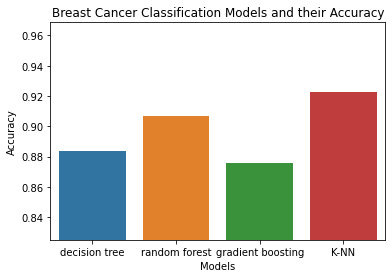

In [26]:
accu = [0.8837209302325582,0.9069767441860465,0.875968992248062,0.9224806201550387]
models = ['decision tree','random forest','gradient boosting','K-NN']


import seaborn as sns
import matplotlib.pyplot as plt

# create bar plot
sns.barplot(x=models, y=accu)
plt.ylim(.825)

# add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Breast Cancer Classification Models and their Accuracy")

# display plot
plt.show()

Conclusion : K-NN is better model over others!